<a href="https://colab.research.google.com/github/lpoggetto/aulas_machine_learning_FIAP/blob/main/trabalho_grupo_20240919.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

ATIVIDADE 2: RegLin

1. Escolha uma base de dados no https://www.kaggle.com/datasets, e se familiarize com sua base
2. Procure realizar a previsão (inferência) de uma variável numérica através de uma regressão linear. Se certifique que existe correlação entre as features escolhidas e o label a ser previsto,   
3. Não esqueça de junto com seus códigos realizar suas análises/conclusões (use o botão de +Texto).

In [73]:
#https://www.kaggle.com/datasets/mirichoi0218/insurance
df = pd.read_csv('insurance.csv')

In [74]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [75]:
# one hot encoding the region variable
df = pd.get_dummies(df, columns=['region', 'sex', 'smoker'], drop_first = True)



In [76]:
df.head()

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,False,True,False,True
1,18,33.770,1,1725.55230,False,True,False,True,False
2,28,33.000,3,4449.46200,False,True,False,True,False
3,33,22.705,0,21984.47061,True,False,False,True,False
4,32,28.880,0,3866.85520,True,False,False,True,False


In [86]:
df = df.astype({'region_northwest':'int',
                'region_southeast':'int',
                'region_southwest':'int',
                'sex_male':'int',
                'smoker_yes':'int'})

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [88]:
# separando variaveis dependentes e indepentes
X = df.drop('charges', axis=1)
y = df['charges']

In [89]:
# separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<Axes: >

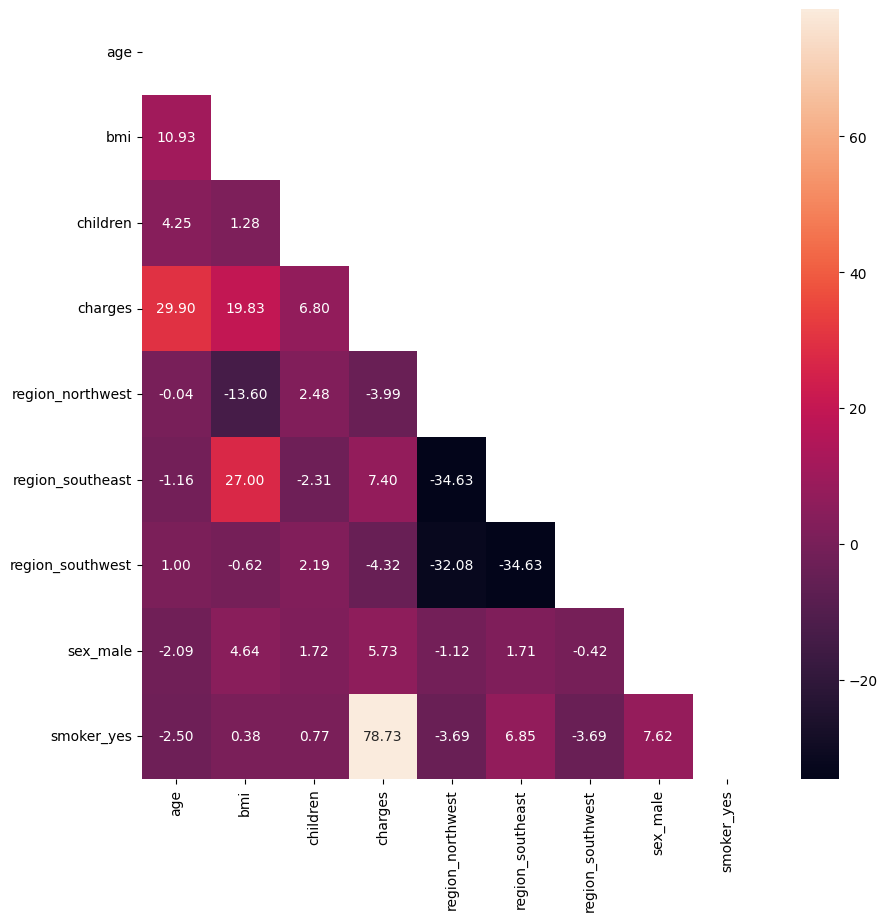

In [90]:
fig, ax = plt.subplots(figsize=(10,10))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr()*100, annot=True, fmt=".2f", mask=mask, ax=ax)

In [91]:
reglin = LinearRegression()
reglin.fit(X_train, y_train)
print(reglin.coef_)
print(reglin.intercept_)

[  261.29692414   348.90691516   424.11912829  -486.93461047
  -970.96883857  -926.32290791   104.81182299 23628.36722236]
-12373.963903035492


In [92]:
pred = reglin.predict(X_test)
pred

array([ 9.01636753e+03,  7.01997635e+03,  3.68708343e+04,  9.51853774e+03,
        2.69740308e+04,  1.10808462e+04, -4.06177600e+01,  1.71922331e+04,
        9.74950536e+02,  1.13299594e+04,  2.80574861e+04,  9.47838799e+03,
        4.98095281e+03,  3.84564701e+04,  4.03433327e+04,  3.71038753e+04,
        1.51982019e+04,  3.57689693e+04,  8.88568387e+03,  3.13835989e+04,
        3.79641903e+03,  1.02628964e+04,  2.37593679e+03,  7.26280819e+03,
        1.12875675e+04,  1.31383480e+04,  1.46241614e+04,  6.07324604e+03,
        1.00361537e+04,  1.97927814e+03,  9.07103928e+03,  1.31369887e+04,
        4.30868680e+03,  3.21105955e+03,  4.48957162e+03,  1.33774493e+04,
        1.82221028e+03,  8.79191682e+03,  3.31981518e+04,  3.25005781e+04,
        3.76368816e+03,  4.35479656e+03,  1.42473276e+04,  1.15436019e+04,
        8.70433805e+03,  1.22401028e+04,  5.20831471e+03,  2.98293172e+03,
        3.54465532e+04,  9.10285846e+03,  1.57820945e+04,  2.13473894e+03,
        1.24668220e+04,  

In [93]:
r2_score(y_test, pred)

0.7696118054369011

In [94]:
mse = mean_squared_error(y_test, pred)
print('MSE Teste', mse)
print('RMSE Teste', np.sqrt(mse))

MSE Teste 33780509.57479164
RMSE Teste 5812.100272258871
